1.Import Libraries and Create Display Image Function

In [ ]:
# Import Necessary Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern, graycomatrix, graycoprops, hog

#Create Function to Display Images
def display_image(title, img, cmap='gray'):
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

2.Load and Prepare the Image

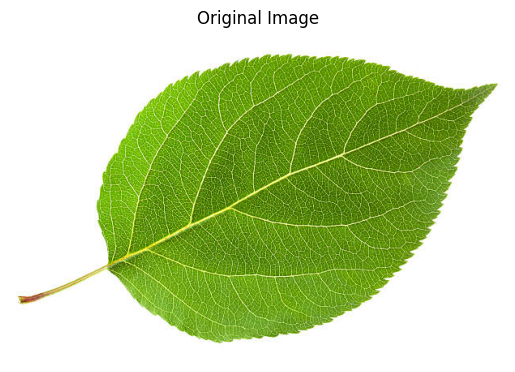

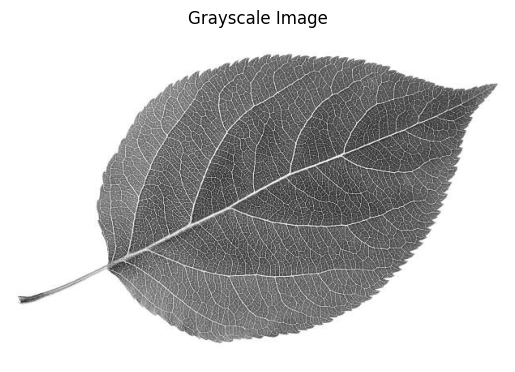

In [ ]:
# Load and Prepare the Image
image = cv2.imread('image.jpg')  # Replace with your image path
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display Original and Grayscale Images
display_image("Original Image", cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap=None)
display_image("Grayscale Image", gray_image)

3.Color Features

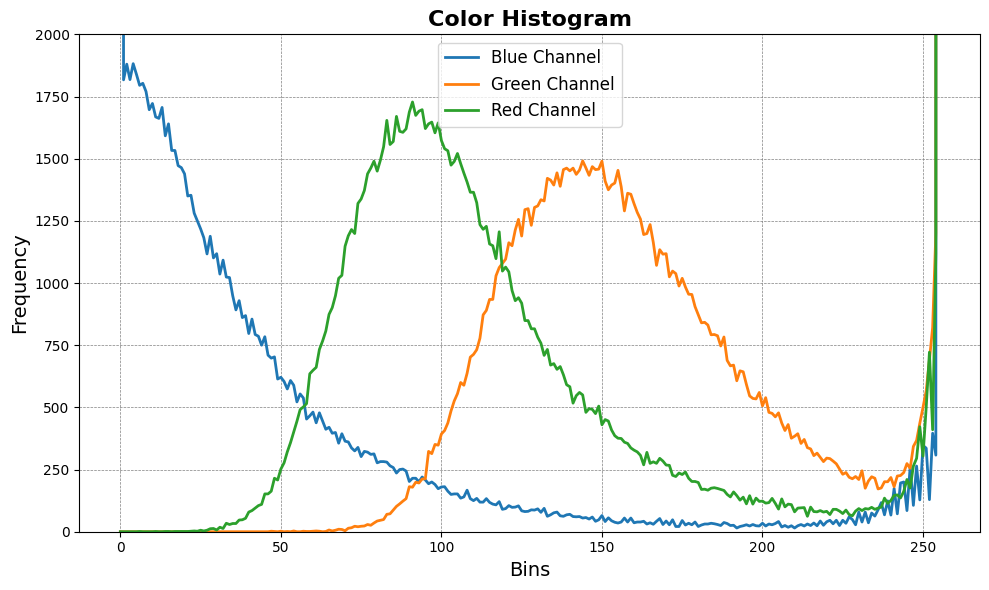

In [ ]:
# Calculate Color Histogram
color_hist = []
channels = ['Blue', 'Green', 'Red']
for i, channel in enumerate(channels):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    color_hist.append(hist)

# Plot the Color Histogram
plt.figure(figsize=(10, 6))  # Set the figure size
for i, channel in enumerate(channels):
    plt.plot(color_hist[i], label=f'{channel} Channel', linewidth=2)  # Set line width

# Set y-axis limits to 0-2000
plt.ylim(0, 2000)  # y-axis minimum and maximum values

# Add grid, title, and labels
plt.title("Color Histogram", fontsize=16, fontweight='bold')  # Title
plt.xlabel("Bins", fontsize=14)  # X-axis label
plt.ylabel("Frequency", fontsize=14)  # Y-axis label
plt.legend(fontsize=12)  # Legend with font size
plt.grid(color='gray', linestyle='--', linewidth=0.5)  # Light grid for better visualization
plt.tight_layout()  # Adjust layout
plt.show()

4.Texture Features - Local Binary Pattern (LBP)

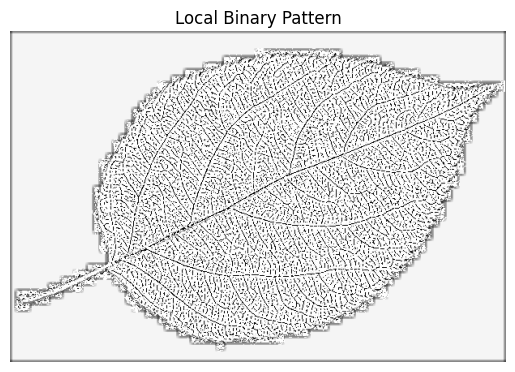

In [ ]:
# Local Binary Pattern (LBP)
radius = 3
n_points = 8 * radius
lbp = local_binary_pattern(gray_image, n_points, radius, method='uniform')

# Plot LBP Image
display_image("Local Binary Pattern", lbp)



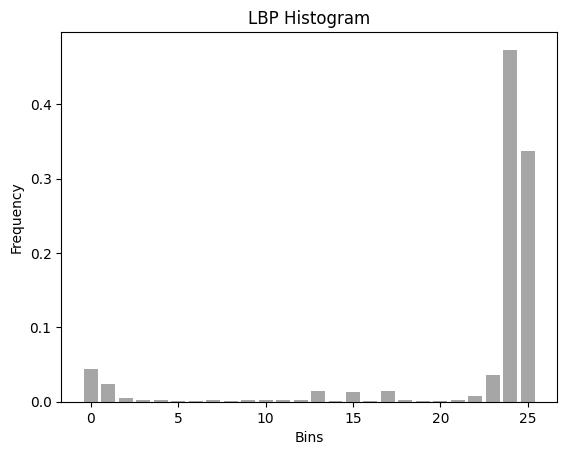

In [ ]:
# Plot the LBP histogram
plt.bar(range(len(hist)), hist, color='gray', alpha=0.7)
plt.title("LBP Histogram")
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.show()

5.Texture Features - GLCM

In [ ]:
# Gray-Level Co-occurrence Matrix (GLCM)
glcm = graycomatrix(gray_image, distances=[5], angles=[0], symmetric=True, normed=True)
contrast = graycoprops(glcm, 'contrast')[0, 0]
energy = graycoprops(glcm, 'energy')[0, 0]
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
print("GLCM Features - Contrast:", contrast, "Energy:", energy, "Homogeneity:", homogeneity)

GLCM Features - Contrast: 1229.5730812094198 Energy: 0.4589844130203846 Homogeneity: 0.48450910454131113


6.Shape Features - Edge Detection (Canny)

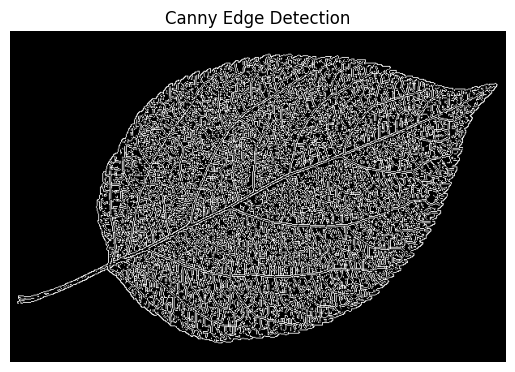

In [ ]:
# Canny Edge Detection
edges = cv2.Canny(gray_image, 100, 200)
display_image("Canny Edge Detection", edges)

7.Shape Features - Contour Areas

Shape Features (Top 5 Contour Areas): [14578.0, 2891.0, 880.5, 510.5, 352.0]


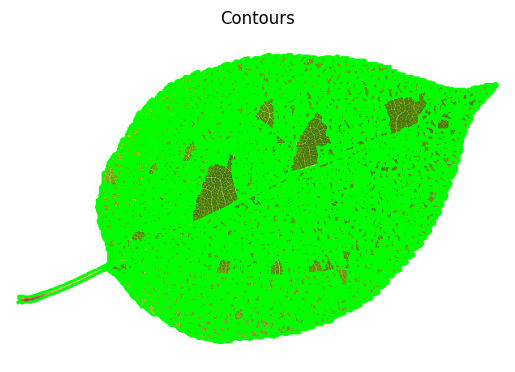

In [ ]:
# Contour Areas
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
areas = [cv2.contourArea(c) for c in contours]
areas = sorted(areas, reverse=True)[:5]  # Top 5 areas
print("Shape Features (Top 5 Contour Areas):", areas)

# Plot Contours on Original Image
contoured_image = image.copy()
cv2.drawContours(contoured_image, contours, -1, (0, 255, 0), 2)
display_image("Contours", cv2.cvtColor(contoured_image, cv2.COLOR_BGR2RGB), cmap=None)

8.Histogram of Oriented Gradients (HOG)

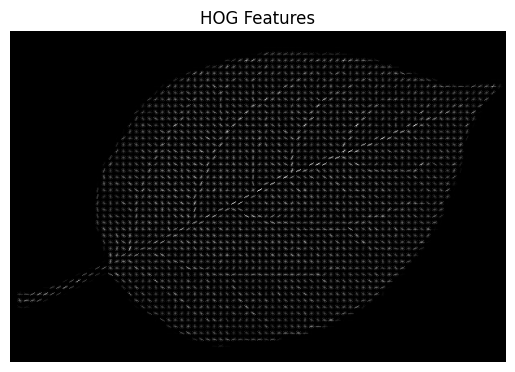

HOG Feature Vector Length: 135000


In [ ]:
# Extract HOG Features
hog_features, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), visualize=True, channel_axis=None)

# Plot HOG Image
display_image("HOG Features", hog_image)

print("HOG Feature Vector Length:", len(hog_features))

9.Keypoint Features (SIFT)

Keypoint Features (Number of Keypoints): 424


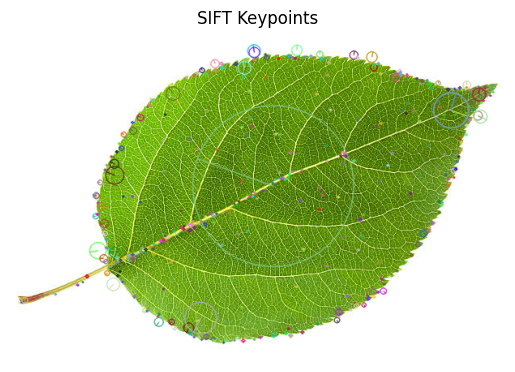

In [ ]:
# SIFT Keypoint Detection
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray_image, None)
print("Keypoint Features (Number of Keypoints):", len(keypoints))

# Draw Keypoints on the Image
keypoint_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
display_image("SIFT Keypoints", cv2.cvtColor(keypoint_image, cv2.COLOR_BGR2RGB), cmap=None)

10.Statistical Features

Statistical Features - Mean: 191.25138968986286 Std Dev: 68.51966351585297 Variance: 4694.9442883257125


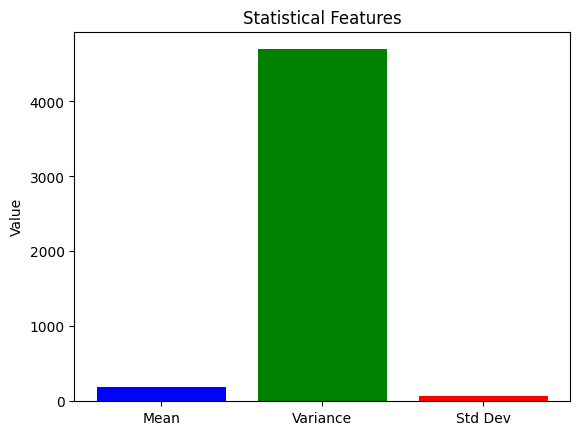

In [ ]:
# Statistical Features
mean = np.mean(gray_image)
std_dev = np.std(gray_image)
variance = np.var(gray_image)
print("Statistical Features - Mean:", mean, "Std Dev:", std_dev, "Variance:", variance)

# Bar Chart for Statistical Features
stats = ['Mean', 'Variance', 'Std Dev']
values = [mean, variance, std_dev]
plt.bar(stats, values, color=['blue', 'green', 'red'])
plt.title("Statistical Features")
plt.ylabel("Value")
plt.show()